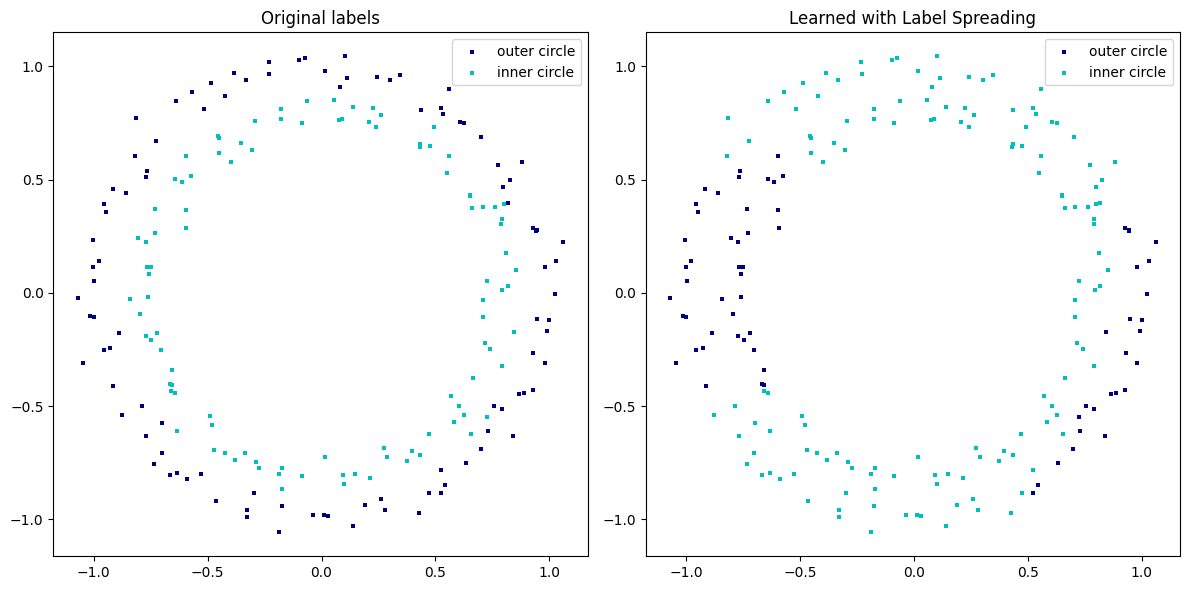

In [2]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.semi_supervised import LabelSpreading
import matplotlib.pyplot as plt

# Generate the dataset
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False, noise=0.05, random_state=42)

# Initialize labels to -1 (unlabeled) and then set one label for each circle
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
labels[0] = outer  # Label for the first point in the outer circle
labels[-1] = inner  # Label for the last point in the inner circle

# Instantiate Label Spreading model and fit it to the data
label_spread = LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(X, labels)

# Predict the labels and output the label distributions
output_labels = label_spread.transduction_
label_distributions = label_spread.label_distributions_

# Plot the result
plt.figure(figsize=(12, 6))

# Plot original labels
plt.subplot(1, 2, 1)
plt.title("Original labels")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='navy', marker='s', lw=0, s=10, label="outer circle")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='c', marker='s', lw=0, s=10, label="inner circle")
plt.legend()

# Plot learned labels
plt.subplot(1, 2, 2)
plt.title("Learned with Label Spreading")
plt.scatter(X[output_labels == 0, 0], X[output_labels == 0, 1], color='navy', marker='s', lw=0, s=10,
            label="outer circle")
plt.scatter(X[output_labels == 1, 0], X[output_labels == 1, 1], color='c', marker='s', lw=0, s=10,
            label="inner circle")
plt.legend()

plt.tight_layout()
plt.show()
